In [1]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

In [3]:
credentials = ServiceAccountCredentials.from_json_keyfile_name(
    "../../../gckey.json",
    [
        "https://spreadsheets.google.com/feeds",
        "https://www.googleapis.com/auth/drive",
    ],
)
client = gspread.authorize(credentials)
spreadsheet = client.open("MaLA data mixing ablation")
Flores_Llama_Altruistic = spreadsheet.worksheet("Llama-3.1-8B-Altruistic-BLEU")

In [4]:
Flores_Llama_Altruistic_Data = Flores_Llama_Altruistic.get_all_records(value_render_option="UNFORMATTED_VALUE")
df = pd.DataFrame(Flores_Llama_Altruistic_Data, columns=Flores_Llama_Altruistic_Data[0])
df = df.replace('', np.nan)

/tmp/ipykernel_3148004/661054580.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('', np.nan)


In [5]:
df

,Languages,Model,checkpoint-500,checkpoint-1000,checkpoint-1500,checkpoint-2000,checkpoint-2500,checkpoint-3000,checkpoint-3500,checkpoint-4000,checkpoint-4500,checkpoint-5000,checkpoint-5500,checkpoint-6000
0,All,Llama-3.1-8B-Bilingual-Altruistic,4.656495,4.329897,3.765452,4.445329,3.591399,3.823631,3.388726,3.991609,NaN,NaN,NaN,NaN
1,All,Llama-3.1-8B-Bilingual-Code-Altruistic,5.304443,5.300618,5.737631,5.570429,4.968886,5.425721,5.154338,5.264561,5.376889,6.138490,NaN,NaN
2,All,Llama-3.1-8B-Monolingual-Altruistic,21.883011,22.649541,21.724990,24.021958,21.094987,22.218387,20.291049,20.997484,20.606547,21.657270,21.140061,NaN
3,All,Llama-3.1-8B-Monolingual-Code-Altruistic,18.983069,21.112953,22.156730,20.286686,22.467447,20.486082,19.849451,21.905758,21.884652,20.492169,20.836203,21.183797
4,High,Llama-3.1-8B-Bilingual-Altruistic,6.629187,7.357509,5.746350,6.540052,6.035932,6.847291,5.919303,6.619542,NaN,NaN,NaN,NaN
5,High,Llama-3.1-8B-Bilingual-Code-Altruistic,7.057161,6.685656,8.789141,7.565044,6.934598,8.298342,7.042627,7.147322,8.967689,9.401674,NaN,NaN
6,High,Llama-3.1-8B-Monolingual-Altruistic,22.752216,21.334273,19.858314,21.639023,18.782302,20.183474,18.096893,18.924009,18.583283,18.866955,18.992667,NaN
7,High,Llama-3.1-8B-Monolingual-Code-Altruistic,21.337541,20.812354,21.020393,19.781537,20.312092,19.566083,19.062981,20.034842,20.358584,19.665058,19.571690,19.683987
8,Medium,Llama-3.1-8B-Bilingual-Altruistic,6.086182,5.380293,5.144750,5.530240,4.449213,4.815050,4.249529,4.954951,NaN,NaN,NaN,NaN
9,Medium,Llama-3.1-8B-Bilingual-Code-Altruistic,7.175996,7.122771,7.380609,7.186535,6.336968,6.527115,6.523090,6.501372,5.909437,7.246985,NaN,NaN


In [6]:
df_dropped = df.drop(columns=["Languages"])
df_all, df_high, df_medium, df_low = [df_dropped.iloc[i:i+4] for i in range(0, len(df_dropped), 4)]

In [7]:
df_all

,Model,checkpoint-500,checkpoint-1000,checkpoint-1500,checkpoint-2000,checkpoint-2500,checkpoint-3000,checkpoint-3500,checkpoint-4000,checkpoint-4500,checkpoint-5000,checkpoint-5500,checkpoint-6000
0,Llama-3.1-8B-Bilingual-Altruistic,4.656495,4.329897,3.765452,4.445329,3.591399,3.823631,3.388726,3.991609,NaN,NaN,NaN,NaN
1,Llama-3.1-8B-Bilingual-Code-Altruistic,5.304443,5.300618,5.737631,5.570429,4.968886,5.425721,5.154338,5.264561,5.376889,6.138490,NaN,NaN
2,Llama-3.1-8B-Monolingual-Altruistic,21.883011,22.649541,21.724990,24.021958,21.094987,22.218387,20.291049,20.997484,20.606547,21.657270,21.140061,NaN
3,Llama-3.1-8B-Monolingual-Code-Altruistic,18.983069,21.112953,22.156730,20.286686,22.467447,20.486082,19.849451,21.905758,21.884652,20.492169,20.836203,21.183797


In [8]:
model_info = {
    "Llama-3.1-8B-Bilingual-Code-Altruistic": {
        "final_ckpt": 5000,
        "total_tokens": 300e6,  # 300M
    },
    "Llama-3.1-8B-Monolingual-Code-Altruistic": {
        "final_ckpt": 6000,
        "total_tokens": 300e6,  # 300M
    },
    "Llama-3.1-8B-Bilingual-Altruistic": {
        "final_ckpt": 4000, 
        "total_tokens": 200e6   # 200M
    },  
    "Llama-3.1-8B-Monolingual-Altruistic": {
        "final_ckpt": 5500,
        "total_tokens": 200e6,  # 200M
    },
}


def ckpt_to_tokens(model_name: str, ckpt: int) -> float:
    """
    Given model name and checkpoint numbers, return the corresponding number of trained tokens.
    """
    info = model_info[model_name]
    final_ckpt = info["final_ckpt"]
    total_tokens = info["total_tokens"]
    if ckpt > final_ckpt:
        ckpt = final_ckpt

    return ckpt * (total_tokens / final_ckpt)

checkpoint_cols = [col for col in df.columns if col.startswith("checkpoint-")]

In [9]:
def vis(df, langs_catagory, base_score):
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(10, 6), dpi=120)

    for i, row in df.iterrows():
        model_name = row["Model"]
        if model_name not in model_info:
            continue

        ckpt_bleu_pairs = []
        for col in checkpoint_cols:
            val = row[col]
            if pd.notna(val) and val != "":
                ckpt = int(col.split("-")[1])
                x_tokens = ckpt_to_tokens(model_name, ckpt)
                y_bleu = float(val)
                ckpt_bleu_pairs.append((x_tokens, y_bleu))

        ckpt_bleu_pairs.sort(key=lambda x: x[0])

        xs = [p[0] for p in ckpt_bleu_pairs]
        ys = [p[1] for p in ckpt_bleu_pairs]

        plt.plot(
            xs, ys, marker="o", linestyle="-", linewidth=2, markersize=5, label=model_name
        )

    plt.axhline(y=base_score, color='red', linestyle='--', linewidth=1.5, label=f"Llama-3.1-8B Base")

    plt.xlabel("Training Tokens", fontsize=12)
    plt.ylabel("BLEU", fontsize=12)
    plt.title(f"BLEU({langs_catagory}) vs. Training Tokens", fontsize=14, fontweight="bold")

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(loc="lower right", fontsize=9)
    plt.tight_layout()

    plt.show()

In [25]:
def vis_smooth(df, langs_catagory, base_score):
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(10, 6), dpi=120)

    for i, row in df.iterrows():
        model_name = row["Model"]
        if model_name not in model_info:
            continue

        ckpt_bleu_pairs = []
        for col in checkpoint_cols:
            val = row[col]
            if pd.notna(val) and val != "":
                ckpt = int(col.split("-")[1])
                x_tokens = ckpt_to_tokens(model_name, ckpt)
                y_bleu = float(val)
                ckpt_bleu_pairs.append((x_tokens, y_bleu))

        ckpt_bleu_pairs.sort(key=lambda x: x[0])

        xs = np.array([p[0] for p in ckpt_bleu_pairs])
        ys = np.array([p[1] for p in ckpt_bleu_pairs])

        # Smoothing the curve
        if len(xs) > 2:  # Ensure sufficient points for smoothing
            x_smooth = np.linspace(xs.min(), xs.max(), 200)
            spline = make_interp_spline(xs, ys, k=3)  # k=3 for cubic spline
            y_smooth = spline(x_smooth)

            # Calculate stderr (replace with actual stderr calculation if available)
            stderr = np.std(ys) / np.sqrt(len(ys))
            y_lower = y_smooth - stderr
            y_upper = y_smooth + stderr

            # Plot smooth curve and stderr
            plt.plot(x_smooth, y_smooth, label=model_name, linewidth=2)
            plt.fill_between(x_smooth, y_lower, y_upper, alpha=0.2)
        else:
            # Plot raw data if not enough points for smoothing
            plt.plot(xs, ys, marker="o", linestyle="-", linewidth=2, markersize=5, label=model_name)

    plt.axhline(y=base_score, color='red', linestyle='--', linewidth=1.5, label=f"Llama-3.1-8B Base")

    plt.xlabel("Training Tokens", fontsize=12)
    plt.ylabel("BLEU", fontsize=12)
    plt.title(f"BLEU({langs_catagory}) vs. Training Tokens", fontsize=14, fontweight="bold")

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(loc="center right", fontsize=9)
    plt.tight_layout()

    plt.show()

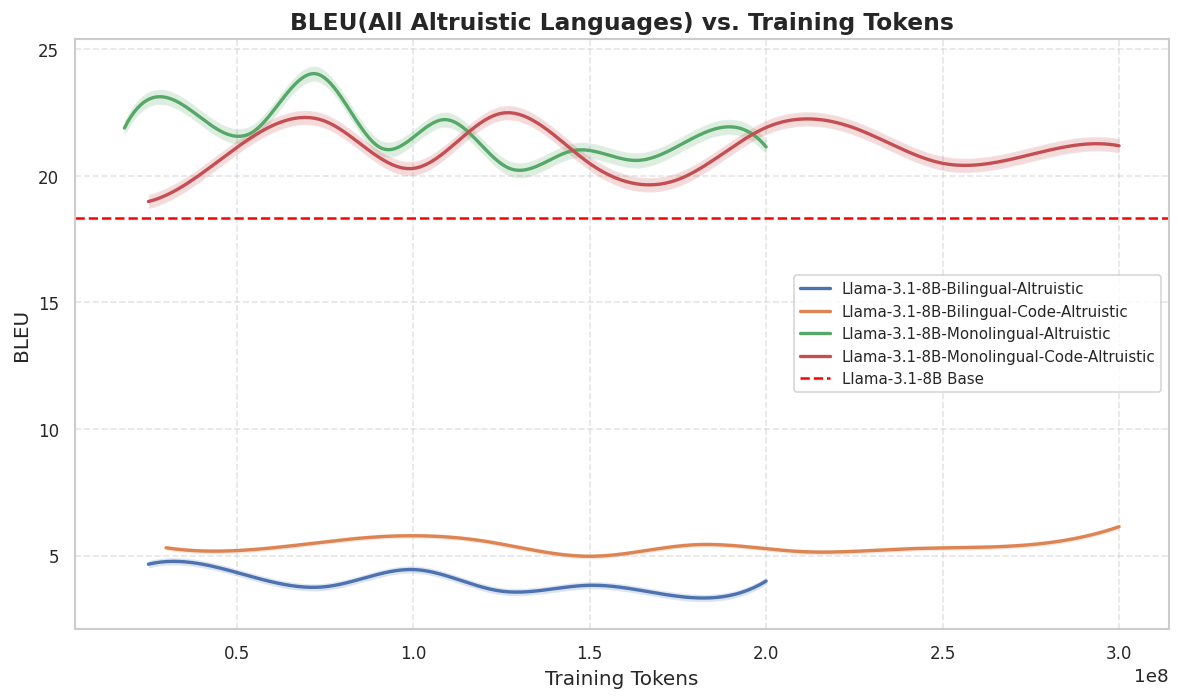

In [26]:
vis_smooth(df_all, "All Altruistic Languages", 18.34)

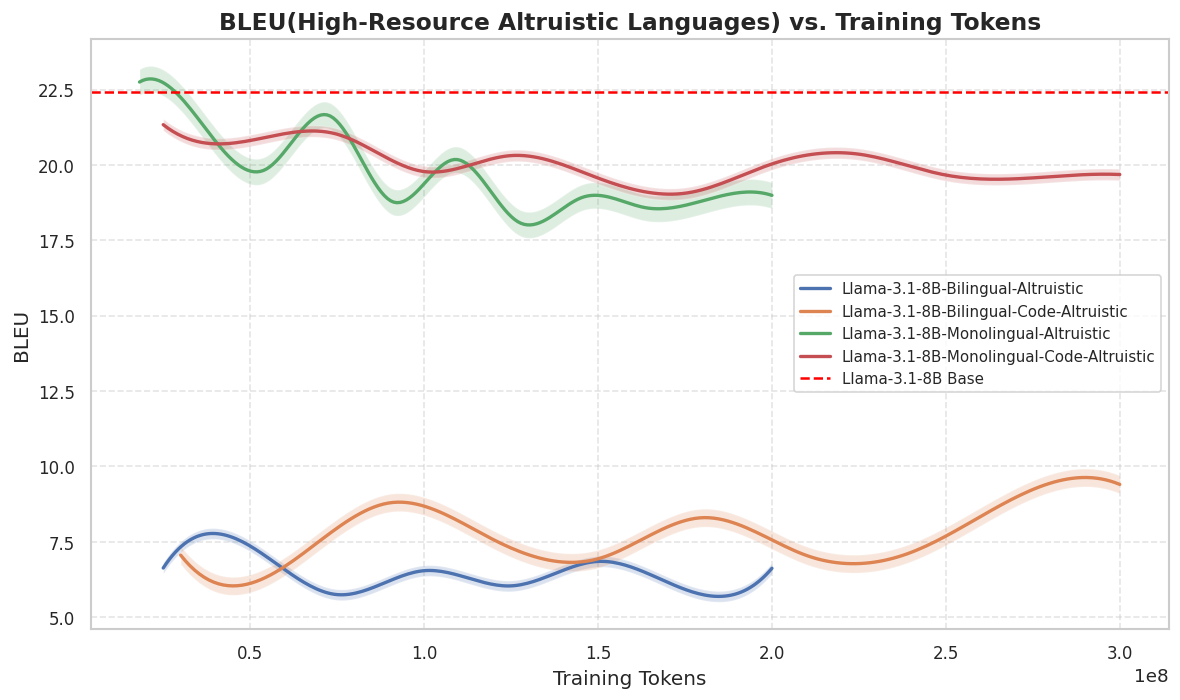

In [27]:
vis_smooth(df_high, "High-Resource Altruistic Languages", 22.43)

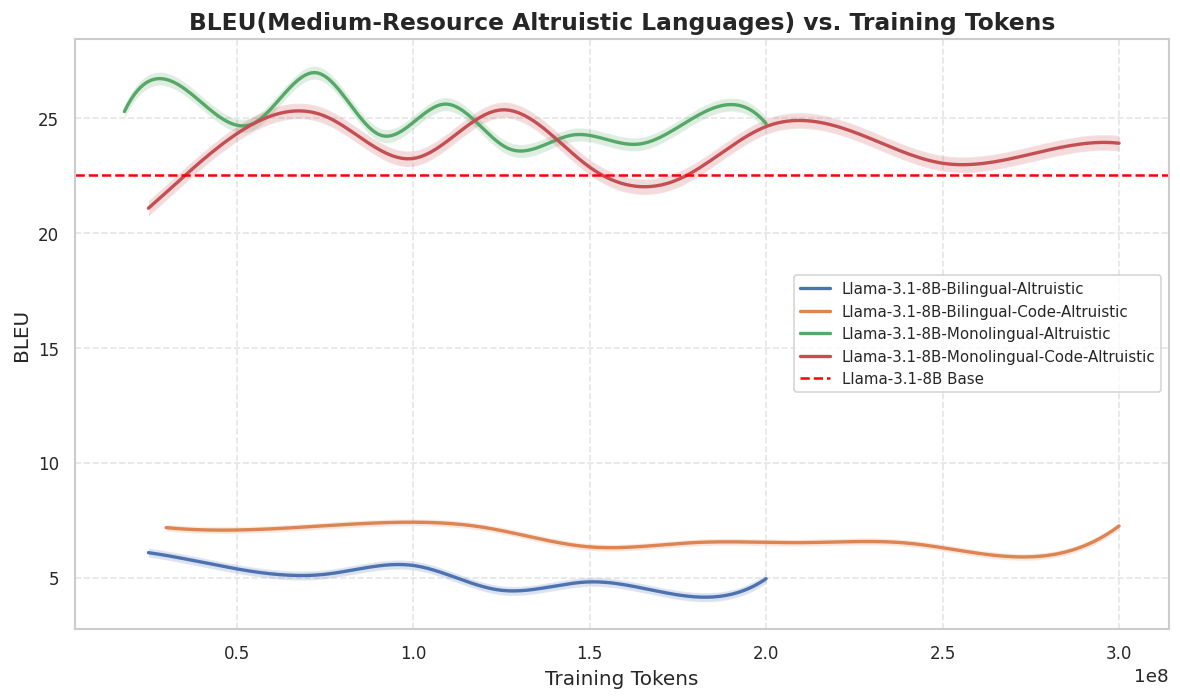

In [28]:
vis_smooth(df_medium, "Medium-Resource Altruistic Languages", 22.53)

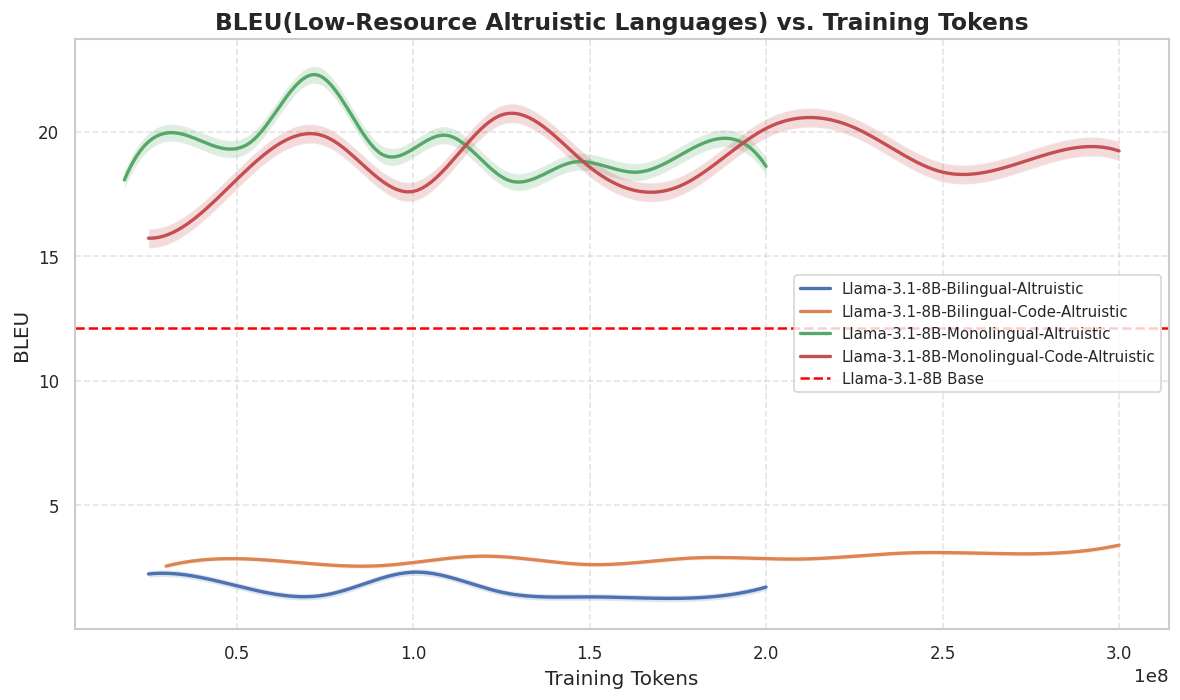

In [29]:
vis_smooth(df_low, "Low-Resource Altruistic Languages", 12.12)